Enlace: https://github.com/SinghKing99/inteligencia_artifical

Autor: Dilpreet Singh

In [ ]:

import os

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
#df = pd.read_csv(os.path.join("/content/drive/My Drive/Colab Notebooks/Inteligencia Artificial/fifa.csv"))
df = pd.read_csv(os.path.join("..","in","fifa.csv"))
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Cleaning Data

# Eliminación de las columnas no relevantes

Ya que nuestro objetivo principal hacer predicciones sobre los valores de los jugadores, miramos qué caracteríaticas realmente están intrísicamente relacionadas con la columna "Value". Por ejemplo, una columna que especifica una habilidad del jugador será importante para determinar el valor final, en cambio, la columna "Photo" no puede ser relacionada de ninguna forma para determinar ese valor del jugador. 

Estudiamos columnas por columnas del df y eliminamos las menos relevantes:

No nos interesan las primeras dos columnas, así que las eliminamos:

In [ ]:
df = df.iloc[:, 2:]
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Analizando los datos, podemos observar que también se pueden eliminar las siguientes columnas del dataframe ya que no aportan un significado para calcular el valor de un jugador:

Las habilidades de un jugador son las que determinan su precio real. En cambuio, las columnas como nombre, nacionalidad, foto, bandera, logo del club y cara no determinan de ninguna forma este valor, por lo tanto, no nos interesan y las podemos eliminar.

Altura: un jugador puede tener buenas habilidades independientemente de su altura. Por ejemplo, C. Ronaldo es uno de los más altos y Messi no es alto. Sin embargo, los dos se encuentran en posiciones altas. Teniendo en cuenta lo anterior, se puede eliminar esta columna.

Peso: podemos hacer la misma suposición para el peso que en la altura. También lo eliminamos.

Pie preferido: interesa que los jugadores diestros se encuentren en la posición derecha y los zurdos en la posición izquierda. Pero estos jugadores tienen el pie débil bastante entrenado, no importa mucho el pie preferido. Si tenemos dos jugadores con mismas habilidades y condiciones, pero uno es diestro y el otro es zurdo, y además, uno se encuentra en la posición delantera derecha y el otro en la izquierda, los valores de estos jugadores serán los mismos.

Salario: no es el salario que determina el valor del jugador, sino es el jugador que condiciona el salario.

Contato válido hasta: solamente es un contrato, eso sí, puede ser que los precios en los contratos de un año sean diferente de los contratos de otros años, pero esto afectaría a todos los jugadores por igual. Así que, lo podemos eliminar.

Tipo de cuerpo: es indiferente para ser un jugador bueno.

Desde la columna "LS" hasta "RB": no sabemos el significado de esas columnas, tampoco aparece de forma clara en otros recursos, podemos suponer que no son columnas importante.


In [ ]:
col_to_drop=["Name","Nationality","Photo","Flag","Club Logo","Real Face","Height","Weight","Preferred Foot","Wage","Jersey Number","Joined","Contract Valid Until","Body Type","LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB"]
df=df.drop(axis=1,columns=col_to_drop)

# Handling NaN's

Antes de todo, generamos una gráfica visual que nos ayudará a identificar las columnas que contienen valores nans. Podemos utilizar el heatmap para ello:

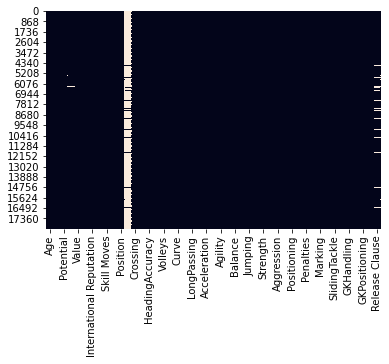

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

Como podemos ver en la gráfica, hay una columna a que le faltan prácticamente todos los valores, así que tenemos que eliminar esta columna del dataframe. Luego, también hay algunas columnas a las que les faltan algunos valores, como son pocos tenemos que buscar una solución ya que no podemos eliminar toda la columna.

Empezaremos eliminando la columna que tiene muchos (la gran mayoria) valores NaN. Con mayoría podemos entender aquellas que tengan más de 1/4 de valores NaN (es una suposición personal). Véamos el número de filas y columnas que tiene nuestro df:

In [ ]:
df.shape

(18207, 47)

Nuestro data frame tiene 18207/4 = 4552 filas aprox. Entonces nuestro threshold (número de valores NaN mínimo que tiene que tener una columna para que sea elminada del df) será 4552 -> ~=4550

In [ ]:
df = df.dropna(thresh=4550,axis=1)

Como podéis ver, se ha eliminado una columna del data frame sin importar su nombre, pues le faltaban muchos valores. 

Ya que los datos son de la FIFA, eliminamos aquellos jugadores (filas) cuyos clubs no pertenecen en FIFA:

In [ ]:
df = df.dropna(subset = ['Club'])

Miramos el número de los valores NA's que tiene cada columna:

In [ ]:
for col in df:
    print(col)
    print(df[col].isnull().sum())

Age
0
Overall
0
Potential
0
Club
0
Value
0
Special
0
International Reputation
48
Weak Foot
48
Skill Moves
48
Work Rate
48
Position
48
Crossing
48
Finishing
48
HeadingAccuracy
48
ShortPassing
48
Volleys
48
Dribbling
48
Curve
48
FKAccuracy
48
LongPassing
48
BallControl
48
Acceleration
48
SprintSpeed
48
Agility
48
Reactions
48
Balance
48
ShotPower
48
Jumping
48
Stamina
48
Strength
48
LongShots
48
Aggression
48
Interceptions
48
Positioning
48
Vision
48
Penalties
48
Composure
48
Marking
48
StandingTackle
48
SlidingTackle
48
GKDiving
48
GKHandling
48
GKKicking
48
GKPositioning
48
GKReflexes
48
Release Clause
1323


Se vé que hay 48 filas que tienen valores nans para muchas columnas. Entonces, nos interesará eliminar dichas filas además de que no son muchas comparadas con el número de filas totales. Bastaría si trabajamos con una única columna para eliminar las filas.

Como ya hemos dicho, bastaría eliminar estas filas haciendo referencia a una de las varias columnas que las contien. Por ejemplo, la columna Posición:

In [ ]:
df = df.dropna(axis=0, how='any',subset=["Position"])

In [ ]:
for col in df:
  print(col)
  print(df[col].isnull().sum())

Age
0
Overall
0
Potential
0
Club
0
Value
0
Special
0
International Reputation
0
Weak Foot
0
Skill Moves
0
Work Rate
0
Position
0
Crossing
0
Finishing
0
HeadingAccuracy
0
ShortPassing
0
Volleys
0
Dribbling
0
Curve
0
FKAccuracy
0
LongPassing
0
BallControl
0
Acceleration
0
SprintSpeed
0
Agility
0
Reactions
0
Balance
0
ShotPower
0
Jumping
0
Stamina
0
Strength
0
LongShots
0
Aggression
0
Interceptions
0
Positioning
0
Vision
0
Penalties
0
Composure
0
Marking
0
StandingTackle
0
SlidingTackle
0
GKDiving
0
GKHandling
0
GKKicking
0
GKPositioning
0
GKReflexes
0
Release Clause
1275


Como podéis ver, la columna "Release Clause" tiene 1275 valores nans. Tenemos dos opciones para arreglar esto:

1) Eliminar la columna si su significado no es relevante para nuestro objetivo

2) Dar ciertos valores a esos valores nans para columnas que podrían tener información relevante (columna "Release Clause")

3) Eliminar filas que tienen valores Nan's

Si queremos conservar esta columna tenemos que elegir entre las opciones dos y tres. Hay un 7% de filas que no tienen esos valores. En vez de eliminarlas, sería mejor si les damos nuevos valores (opción 2).

Tenemos que elegir de varias deciciones que podemos tomar para dar nuevos valores:

1) Dar un valor concreto a todos los nans de la columna (no nos interesa)

2) Asignar el mismo valor que la fila de arriba, o bien la fila de abajo (backward or forward)

3) Hacer una interpolación linear

4) etc

Está claro que la mejor opción es la tercera, así que elegiremos esta opción.

La interpolación linear se hace sobre valores nans, que es del tipo float, pero esta columna es de tipo Object. Entonces, tenemos que hacer casting a float, conservando los valores nans con la ayuda de la función value_to_float.

Tenemos un problema con la columna "Release Clause": los valores nan son tipo float y cuando llamamos a la función value_to_float la función replace solamente es para tipo string. Lo que podemos hacer es asignar a todos los valores nans un valor especial y eliminar las letras de los valores, y por último hacer la interpolación linear.

Hemos modificado ligeramente la función value_to_float() que justo al comenzar compreba si la letra 'X' es contenida en el valor, en caso afirmativo devolvemos un 0.0 . De esta forma se nos guardaran los nans como ceros:

In [ ]:
def value_to_float(x):
    """
    From K and M to float.
    
    """
    if 'X' in x:
      return 0.0
    x = x.replace('€', '')
    ret_val = 0.0
    
    if type(x) == float or type(x) == int:
        ret_val = x
    if 'K' in x:
        if len(x) > 1:
            ret_val = float(x.replace('K', ''))
        ret_val = ret_val *1000
    if 'M' in x:
        if len(x) > 1:
            ret_val = float(x.replace('M', ''))
        ret_val = ret_val * 1000000.0
    return ret_val

Reemplazamos los valores nans por una letra, por ejemplo, "X"

In [ ]:
df["Release Clause"] = df["Release Clause"].replace(np.nan, 'X')

Ahora toca convertir los valores de tipo objeto a float:

In [ ]:
df["Release Clause"] = df["Release Clause"].apply(value_to_float)

Ya que la interpolación se hace sobre los valores nans, volvemos a convertir los ceros a nans:

In [ ]:
df["Release Clause"] = df["Release Clause"].replace(0.0, np.nan)

Ahora ya podemos hacer la interpolación y por lo tanto dar nuevos valores:

In [ ]:
df["Release Clause"].interpolate(inplace=True)
df

,Age,Overall,Potential,Club,Value,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,FC Barcelona,€110.5M,2202,5.0,4.0,4.0,Medium/ Medium,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,94,94,Juventus,€77M,2228,5.0,4.0,5.0,High/ Low,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,92,93,Paris Saint-Germain,€118.5M,2143,5.0,5.0,5.0,High/ Medium,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,91,93,Manchester United,€72M,1471,4.0,3.0,1.0,Medium/ Medium,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,91,92,Manchester City,€102M,2281,4.0,5.0,4.0,High/ High,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,Crewe Alexandra,€60K,1307,1.0,2.0,2.0,Medium/ Medium,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,19,47,63,Trelleborgs FF,€60K,1098,1.0,2.0,2.0,Medium/ Medium,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,16,47,67,Cambridge United,€60K,1189,1.0,3.0,2.0,Medium/ Medium,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,17,47,66,Tranmere Rovers,€60K,1228,1.0,3.0,2.0,Medium/ Medium,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


Comprobamos si ya no quedan valores nans en nuestro dataset, podemos utilizar la herramienta de Heatmap de nuevo:

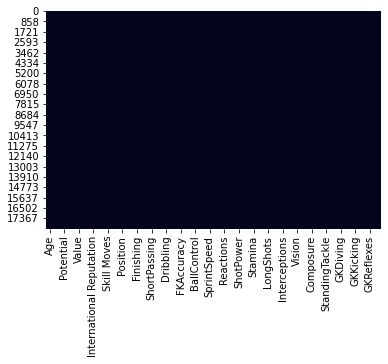

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.isna().sum().sum()

0

Efectivamente, ya no tenemos valores nans en nuestro dataset.

---
---
---

# Casting de las columnas

Tenemos que pasar la columna "Value" en valores tipo float, eliminando las letras que contiene. Para esto aplicaremos la misma función de antes:

In [ ]:
df["Value"] = df["Value"].apply(value_to_float)
df

,Age,Overall,Potential,Club,Value,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,FC Barcelona,110500000.0,2202,5.0,4.0,4.0,Medium/ Medium,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,94,94,Juventus,77000000.0,2228,5.0,4.0,5.0,High/ Low,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,92,93,Paris Saint-Germain,118500000.0,2143,5.0,5.0,5.0,High/ Medium,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,91,93,Manchester United,72000000.0,1471,4.0,3.0,1.0,Medium/ Medium,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,91,92,Manchester City,102000000.0,2281,4.0,5.0,4.0,High/ High,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,Crewe Alexandra,60000.0,1307,1.0,2.0,2.0,Medium/ Medium,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,19,47,63,Trelleborgs FF,60000.0,1098,1.0,2.0,2.0,Medium/ Medium,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,16,47,67,Cambridge United,60000.0,1189,1.0,3.0,2.0,Medium/ Medium,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,17,47,66,Tranmere Rovers,60000.0,1228,1.0,3.0,2.0,Medium/ Medium,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


También hay que arreglar la columna "Work/Rate", haciendo una búsqueda en internet, entendemos con Work el ataque y con Rate la defensa. 

Dado que los valores anteriores están delimitados por una barra, podemos generar tokens de estas y guardar en dos columnas distintas, y por último podemos hacer un drop de la columna original para no tener información repetida:

Generamos dos columnas a partir de los tokens separados por el delimitador "/", haciendo un pop de la columna original al mismo tiempo:

In [ ]:
attack_defense = df.pop("Work Rate").str.split("/", n=1, expand=True)
df["Attack"] = attack_defense[0]
df["Defense"] = attack_defense[1]

Ahora toca arreglar las columnas de las que no podemos hacer casting ya que tienen diferetes tipo de valores o formato de estos, por ejemplo la columna "Club" tienen miles de diferentes clubs, cada uno con un nombre distinto. Necesitamos que esos nombres sean convertidos en números para poder hacer regresión lineal.

Una manera que podríamos pensar es asignar a cada club un número distinto, por ejemplo, en orden ascendente. Pero esta solución no es correcta ya que el ordenador los entiende con pesos distintos. Por ejemplo, si asignamos el número 2 al club de Barça y un 4 al club de Madrid, el computador entiende que Madrid es dos veces mejor que Barça.

Para arreglar este problema podemos optar por one-hot encoding, que nos permetirá generar una columna para cada uno de los diferentes valores de un misma columna. Las columnas generadas tendrán valores 0 o 1, dependiendo si una fila tenia ese valor o no.

Las columnas que necesitan este tipo de enconding son las siguientes:

"Club","Attack","Defense","Position". 

Pero, ahora hay una cuestión que podemos plantear, ¿El club realmente afecta mucho o poco para determinar el valor de un jugador? A un jugador malo siempre le pagarán mal y a un jugador bueno le pagaran bien. Eso sí, el salario puede ser ligeramente variada de un club a otro. Entonces, el club sí afecta, pero no mucho.

El problema de hacer one-hot encoding es que genera una columna para cada valor único de la columna original, por ejemplo, si hay miles de clubs distintos, entonces nos generará miles de columnas. 

Dicho lo anterior, queda reflejado que hacer one-hot encoding de la columna "Club" no sería lo correcto. Entonces la única opción que nos queda es eliminar dicha columna:

In [ ]:
df=df.drop(axis=1,columns="Club")

Ahora tenemos que hacer one-hot encoding de las columnas restantes, mencionadas anteriormente.

Primero de todo vamos a hacer un pop de la columna del dataframe, y luego concatenaremos al nuestro dataframe la tabla resultante tras aplicar one hot encoding sobre esa columna:

In [ ]:
col = df.pop("Position")
df = pd.concat([df.reset_index(drop=True), pd.get_dummies(col, prefix='Position').reset_index(drop=True)], axis=1, sort=False) #Position es el prefijo de la columna

In [ ]:
 col = df.pop("Attack")
 df = pd.concat([df.reset_index(drop=True), pd.get_dummies(col, prefix='Attack').reset_index(drop=True)], axis=1, sort=False) #Attack es el prefijo de la columna

In [ ]:
 col = df.pop("Defense")
 df = pd.concat([df.reset_index(drop=True), pd.get_dummies(col, prefix='Defense').reset_index(drop=True)], axis=1, sort=False) #Defense es el prefijo de la columna

Ya tenemos nuestro dataset preparado para entrenar el modelo.
# Regresión Lineal

Antes de entrenar el modelo, se suele separar el dataframe original en dos tipos de datasets: dataset de entreno (es el que entrena el modelo) y dataset de testeo (es el que utilizaremos luego para hacer predicciones).

Para ello, lo primero de todo hacemos un pop de la columna sobre la cual queremos hacer predicciones, en este caso la columna "Value" y la guardamos en un vector de valores.

Con la ayuda de la función train_test_split podemos indicar el porcentaje de datos que se quiere separar para testeo, en este caso es un 33% y tambiés se le indica una semilla (random_state) para mezclar o desordenar, o mejor dicho un "Shuffle" de las filas.

In [ ]:
val = df.pop("Value")
X_train, X_test, y_train, y_test = train_test_split(df, val, test_size=0.33, random_state=42)

La función anterior devuelve un dataset para entreno (X_train), un dataset para testeo (X_test), una columa de valores "Value" para entreno (y_train) y una columa de valores "Value" para testeo (y_test). 

Ahora entrenamos la regresión lineal con la ayuda de la función LinearRegression del linear_model, pasando por parámetros es dataset de entreno y la columna de valores de entreno:

In [ ]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

La función anterior retorna la regresión lineal que ahora la podemos utilizar para hacer predicciones sobre el dataset de testeo.

La función predict() de la regresion nos devuelve una columna los valores predichos. Para ello, le pasamos por el parámetro el dataset de testeo:

In [ ]:
preds = reg.predict(X_test)

Ahora ya tenemos un vector o una columa de valores predichos. Nuestra intención precisamente es comparar los valores predichos con los de la columna y_train.

La función r2_scores de la librería sklearn es la que nos permitirá comparar las dos columnas, es decir, los valores predichos y los valores que habiamos reservado para hacer testeo.

In [ ]:
r2_score(preds, y_test)

0.987157008046021

###Conclusión
Como se puede observar, el valor de acierto en hacer predicción es de unos 98,71% que es bastante alto. Esto quiere decir que, con nuestra regresión lineal, dadas unas características de un jugador, podemos determinar o predecir su valor real con un acierto de 98,71%. 

Sin embargo, solamente puede predecir los valores con las características o las columnas sobre las que hemos entrenado el modelo. Con esto quiero decir que las columnas que hemos eliminado del dataset original no influyen para predecir los valores.

He empezado con un modelo que necesitaba un tratamiento del dataset ya sea por aquellas características que no determinaban de forma intrínseca los valores de los jugadores, por la presencia de valores Nan's tanto en columnas como en filas, o bien por unos valores que necesitaban una transformación con la ayuda de las fuciones como value_to_float() o one-hot encoding.

Para acabar, cabe mencionar que se ha dedicado la mayor parte tiempo en arreglar el dataset, y no hacer la regresión lineal y la predicción que precisamente era el propósito general del proyecto.